In [1408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib.inline
import seaborn as sns

In [1409]:
df = pd.read_excel("transactions.xlsx")
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [1410]:
print("Number of rows: ", len(df))
df.dtypes

Number of rows:  20000


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [1411]:
print("The following columns have values NaN")
df.isnull().sum()
#Significant number of Nan values in the 

The following columns have values NaN


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [1412]:
df[df["standard_cost"].isnull()]["brand"]

136      NaN
159      NaN
366      NaN
406      NaN
676      NaN
        ... 
19340    NaN
19383    NaN
19793    NaN
19859    NaN
19871    NaN
Name: brand, Length: 197, dtype: object

In [1413]:
df.fillna({'standard_cost': df.list_price}, inplace=True)
print(df.standard_cost.isnull().sum())
df.head()

0


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [1414]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
customer_id,20000.0,1738.246050,1011.951046,1.00,857.75,1736.00,2613.00,5034.00
online_order,19640.0,0.500458,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
standard_cost,20000.0,561.315251,411.549785,7.21,215.14,507.58,795.10,2086.07
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.00,35667.00,38216.00,40672.00,42710.00


In [1415]:
#The brands heavily influence the total sells. Analyze all the different brands
#197 missing value for brand type 
print(df.brand.unique())

['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]


In [1416]:
#df_c = df.sort_values('brand')
print(df.brand.value_counts().head(5))
#print(sorting_df)
top_brand = df.brand.value_counts().idxmax()
print('Brands with most sales: ', top_brand)

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Name: brand, dtype: int64
Brands with most sales:  Solex


Text(0.5, 1.0, 'brand')

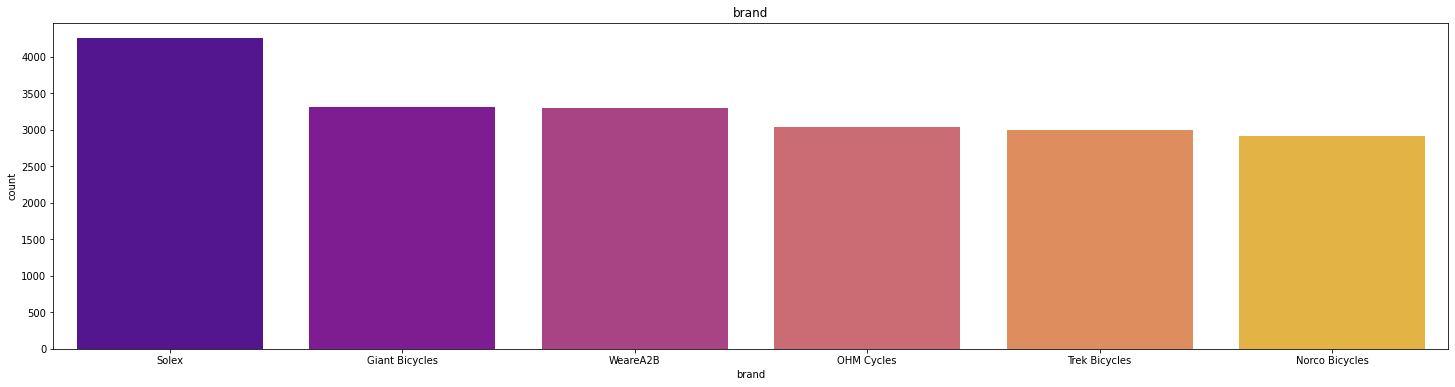

In [1417]:
sns.countplot(df['brand'], palette = "plasma", order = df['brand'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('brand')

In [1418]:
print(df.online_order.unique())

[ 0.  1. nan]


In [1419]:
print(df.online_order.value_counts().head(5))
orders = df.online_order.value_counts().idxmax()
print('Most orders are', orders)

1.0    9829
0.0    9811
Name: online_order, dtype: int64
Most orders are 1.0


Text(0.5, 1.0, 'online_order')

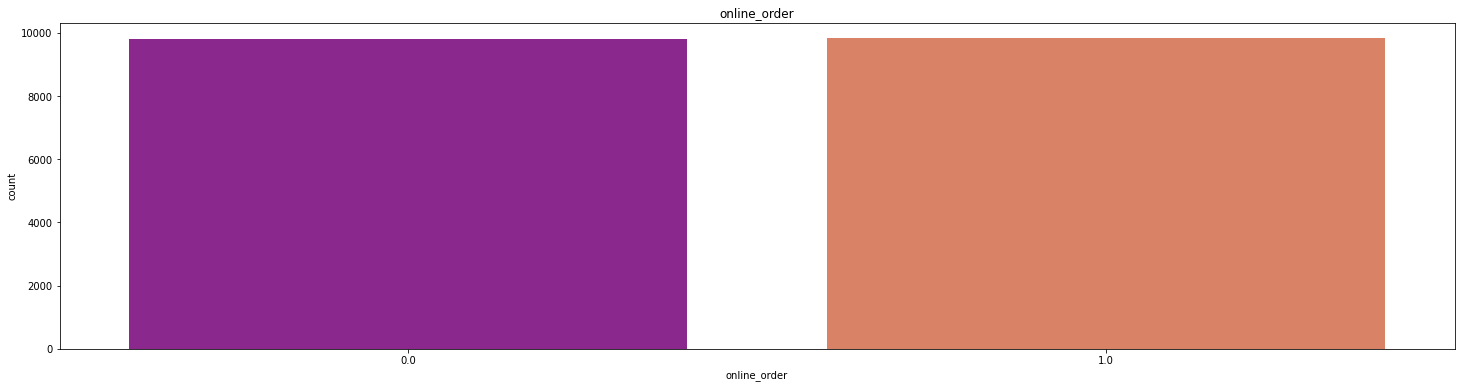

In [1420]:
sns.countplot(df['online_order'], palette = "plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('online_order')

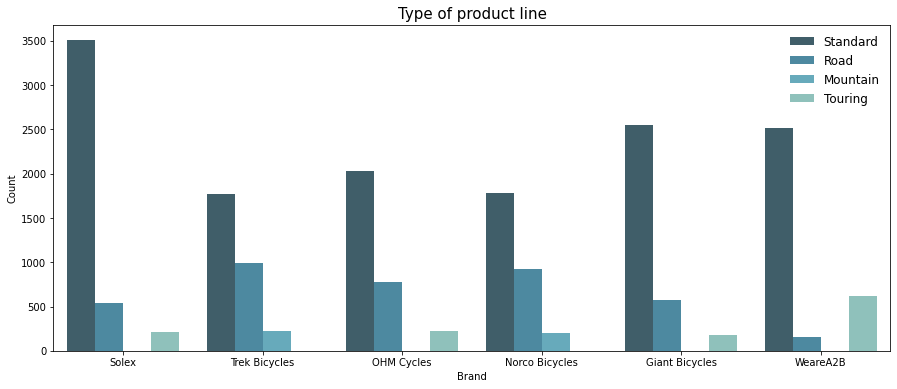

In [1421]:
plt.figure(figsize=(15,6))
sns.countplot(x= df.brand,hue=df.product_line, palette='GnBu_d')
plt.title('Type of product line', fontsize=15)
plt.xlabel('Brand')
plt.ylabel("Count")
plt.legend(frameon=False, fontsize=12)

In [1422]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [1423]:
df['profit'] = df.apply(lambda x: x['list_price'] - x['standard_cost'], axis=1)
df


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


In [1424]:
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
profit                            float64
dtype: object

In [1425]:
customer_demographic = pd.read_excel("CustomerDemographic.xlsx")
import pandas
merged_df = df.merge(customer_demographic, on="customer_id", how = 'inner')

In [1426]:
merged_df["gender"].value_counts()

Female    9993
Male      9525
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

In [1427]:
def standardizeGender(gen):
    if gen[0].lower() == "f":
        return "Female"
    elif gen[0].lower() == "m":
        return "Male"
    else: 
        return "Undefined"

In [1428]:
merged_df["gender"] = merged_df["gender"].apply(lambda x: standardizeGender(x))

In [1429]:
merged_df.head()
merged_df.drop("default", axis = 1, inplace= True)

In [1430]:
merged_df["deceased_indicator"].value_counts()

N    19989
Y        8
Name: deceased_indicator, dtype: int64

In [1431]:
def isDeceased(arg):
    if arg == "N":
        return 0
    else:
        return 1
    
def ownsCar(arg):
    if arg == "Yes":
        return 1
    else:
        return 0
    
    
merged_df["deceased_indicator"] = merged_df["deceased_indicator"].apply(lambda x: isDeceased(x))
merged_df["owns_car"] = merged_df["owns_car"].apply(lambda x: ownsCar(x))

merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,0,1,10.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,0,1,10.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,0,1,10.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,0,1,10.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,0,1,10.0


In [1432]:
merged_df["gender"].value_counts()

Female       10011
Male          9531
Undefined      455
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

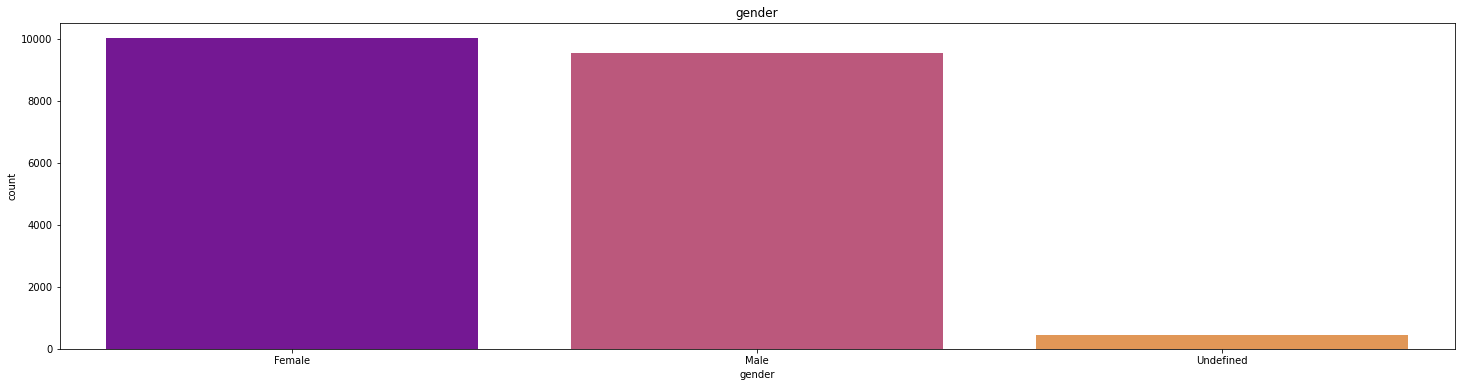

In [1433]:
sns.countplot(merged_df['gender'], palette = "plasma", order = merged_df['gender'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('gender')

In [1434]:
import datetime

merged_df['year'] = merged_df['DOB'].dt.year
DOB = merged_df[['DOB','year']].head()
#print(df['year'])

def age(arg):
    return 2020 - arg 
    
  
    
merged_df['DOB'] = merged_df['year'].apply(lambda x: age(x))
merged_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,41.0,Clinical Specialist,Health,Mass Customer,0,1,10.0,1979.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,41.0,Clinical Specialist,Health,Mass Customer,0,1,10.0,1979.0


In [1435]:
print("The following columns have values NaN")
merged_df.isnull().sum()
#Significant number of Nan values in the 

The following columns have values NaN


transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                            360
order_status                              0
brand                                   197
product_line                            197
product_class                           197
product_size                            197
list_price                                0
standard_cost                             0
product_first_sold_date                 197
profit                                    0
first_name                                0
last_name                               642
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     446
job_title                              2394
job_industry_category                  3229
wealth_segment                            0
deceased_indicator              

In [1436]:
print(merged_df.owns_car.value_counts().head(5))

1    10063
0     9934
Name: owns_car, dtype: int64


Text(0.5, 1.0, 'owns_car')

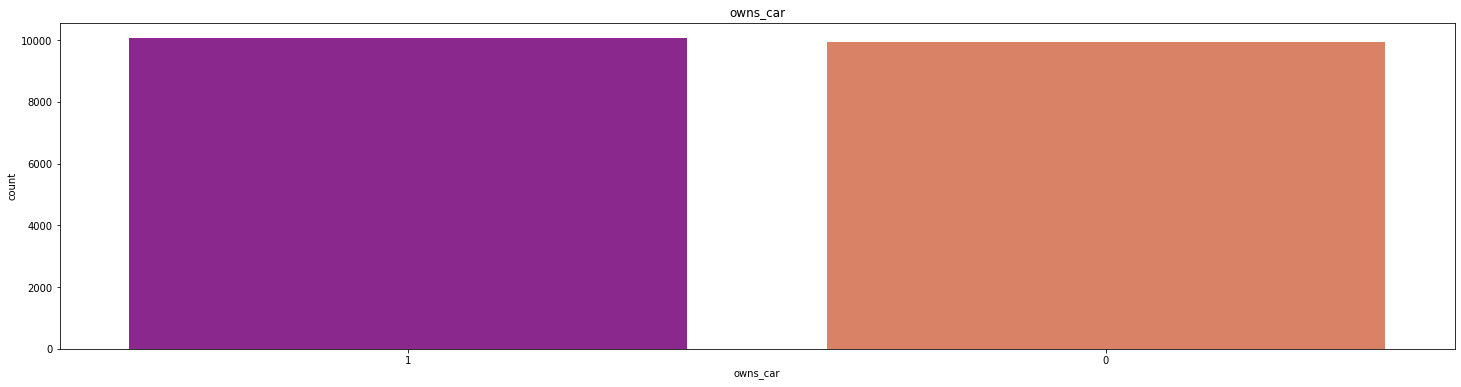

In [1437]:
sns.countplot(merged_df['owns_car'], palette = "plasma", order = merged_df['owns_car'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('owns_car')

In [1438]:
print(merged_df.job_industry_category.value_counts().head(5))

Manufacturing         4014
Financial Services    3886
Health                3099
Retail                1758
Property              1297
Name: job_industry_category, dtype: int64


Text(0.5, 1.0, 'job_industry_category')

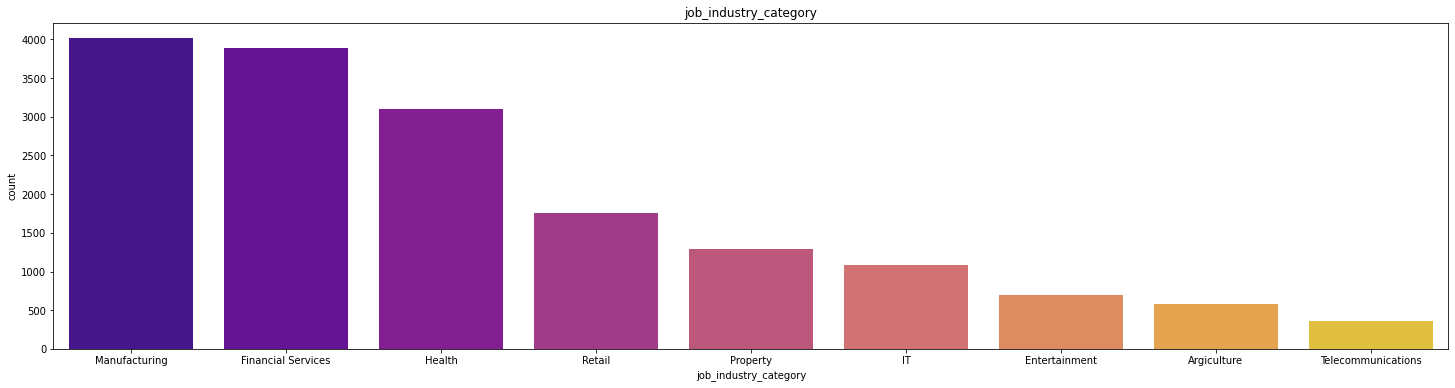

In [1439]:
sns.countplot(merged_df['job_industry_category'], palette = "plasma", order = merged_df['job_industry_category'].value_counts().index)
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('job_industry_category')

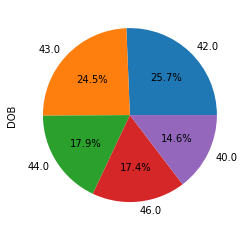

In [1440]:
a = merged_df['DOB'].value_counts().head(5)
a.plot.pie(figsize = (4,4), autopct = '%.1f%%')
##age group banau

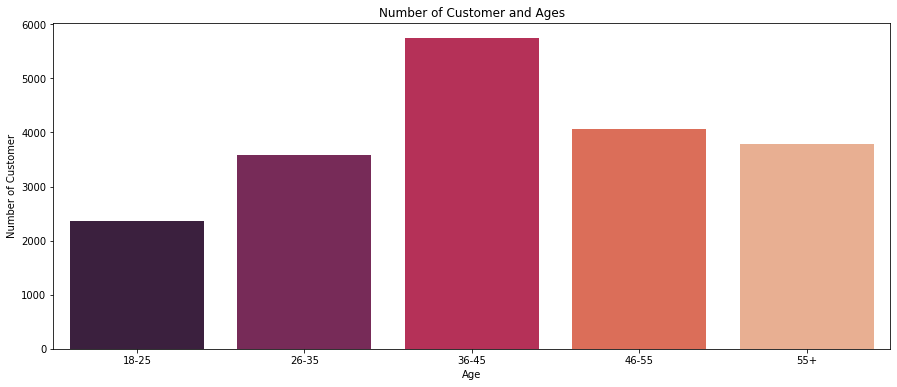

In [1441]:
age18_25 = merged_df.DOB[(merged_df.DOB <= 25) & (merged_df.DOB >= 18)]
age26_35 = merged_df.DOB[(merged_df.DOB <= 35) & (merged_df.DOB >= 26)]
age36_45 = merged_df.DOB[(merged_df.DOB<= 45) & (merged_df.DOB >= 36)]
age46_55 = merged_df.DOB[(merged_df.DOB <= 55) & (merged_df.DOB >= 46)]
age55above = merged_df.DOB[merged_df.DOB >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [1442]:
merged_df.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
profit                                        float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

In [1443]:
print(merged_df.dtypes)

def maxProfit(x):
    if x > 400:
        return 1
    else:
        return 0

merged_df['profit'] = merged_df['profit'].apply(lambda x: maxProfit(x))
#print(merged_df.head())
#print(merged_df['profit'].value_counts().head(5))
merged_df.dtypes


transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
profit                                        float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
profit                                          int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                         

In [1444]:
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,41.0,Clinical Specialist,Health,Mass Customer,0,1,10.0,1979.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,41.0,Clinical Specialist,Health,Mass Customer,0,1,10.0,1979.0


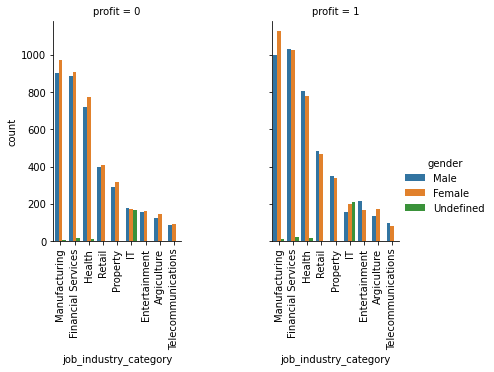

In [1446]:
g = sns.catplot(x="job_industry_category", hue="gender", col="profit",
                data=merged_df, kind="count",
                height=4, aspect=.7, order = merged_df.job_industry_category.value_counts().index)
g.set_xticklabels(rotation = 90)

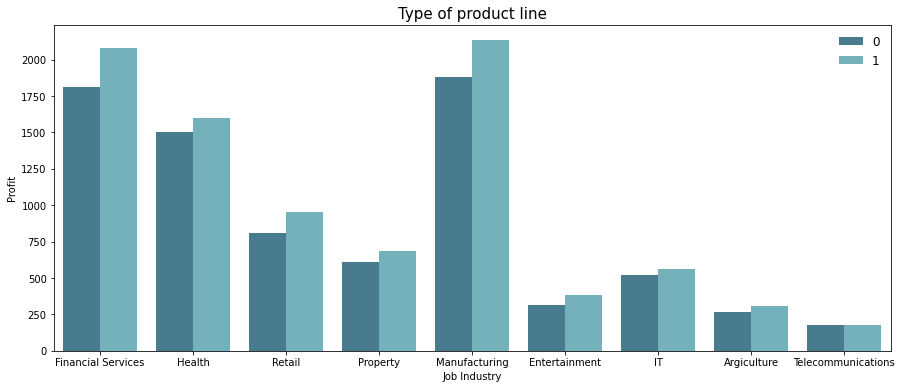

In [1447]:
plt.figure(figsize=(15,6))
sns.countplot(x= merged_df.job_industry_category,hue=merged_df.profit, palette='GnBu_d')
plt.title('Type of product line', fontsize=15)
plt.xlabel('Job Industry')
plt.ylabel("Profit")
plt.legend(frameon=False, fontsize=12)
#plt.set_xticklabels(rotation = 90)

In [1448]:
merged_df.isnull().sum().sort_values(ascending = False).head()

job_industry_category    3229
job_title                2394
last_name                 642
year                      446
tenure                    446
dtype: int64

In [1449]:
merged_df.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,65.0,Software Engineer I,Financial Services,Mass Customer,0,1,10.0,1955.0


In [1450]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [1451]:
#finding the number of unique values of object type
for col_name in merged_df.columns:
    if merged_df[col_name].dtypes =='object':
        a = merged_df[col_name].unique()
        a = len(a)
        print(col_name + " has " + str(a) + " unique vals. ")

order_status has 2 unique vals. 
brand has 7 unique vals. 
product_line has 5 unique vals. 
product_class has 4 unique vals. 
product_size has 4 unique vals. 
first_name has 2839 unique vals. 
last_name has 3268 unique vals. 
gender has 3 unique vals. 
job_title has 196 unique vals. 
job_industry_category has 10 unique vals. 
wealth_segment has 3 unique vals. 


In [1452]:
merged_df.drop(['product_id', 'customer_id','first_name', 'last_name', 'transaction_id', 'transaction_date','year', 'order_status', 'job_title', 'product_first_sold_date'], axis = 1, inplace = True)
merged_df.head()

,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,profit,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,0.0,Solex,Standard,medium,medium,71.49,53.62,0,Male,19,65.0,Financial Services,Mass Customer,0,1,10.0
1,0.0,Giant Bicycles,Standard,medium,medium,1403.50,954.82,1,Male,19,65.0,Financial Services,Mass Customer,0,1,10.0
2,0.0,Solex,Standard,medium,medium,478.16,298.72,0,Male,19,65.0,Financial Services,Mass Customer,0,1,10.0
3,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,1,Female,89,41.0,Health,Mass Customer,0,1,10.0
4,0.0,Giant Bicycles,Standard,high,medium,1129.13,677.48,1,Female,89,41.0,Health,Mass Customer,0,1,10.0


In [1453]:
#finding the number of unique values of object type
for col_name in merged_df.columns:
    if merged_df[col_name].dtypes =='object':
        a = merged_df[col_name].unique()
        a = len(a)
        print(col_name + " has " + str(a) + " unique vals. ")

brand has 7 unique vals. 
product_line has 5 unique vals. 
product_class has 4 unique vals. 
product_size has 4 unique vals. 
gender has 3 unique vals. 
job_industry_category has 10 unique vals. 
wealth_segment has 3 unique vals. 


In [1454]:
#creating a column for each brand, product_line, product_class, product_size, gender,wealth_segment and job_industry_category value 
def dummy_df(df):
    todummy_list = ['brand', 'product_line', 'product_size', 'product_class','gender','job_industry_category', 'wealth_segment']
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], dummy_na = False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis = 1)
    
    return df

In [1455]:
merged_df = dummy_df(merged_df)
merged_df.head()

,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,DOB,deceased_indicator,owns_car,tenure,Giant Bicycles,...,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer
0,0.0,71.49,53.62,0,19,65.0,0,1,10.0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.0,1403.50,954.82,1,19,65.0,0,1,10.0,1,...,1,0,0,0,0,0,0,0,0,1
2,0.0,478.16,298.72,0,19,65.0,0,1,10.0,0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,2091.47,388.92,1,89,41.0,0,1,10.0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.0,1129.13,677.48,1,89,41.0,0,1,10.0,1,...,0,1,0,0,0,0,0,0,0,1


In [1456]:
merged_df.isnull().sum().sort_values(ascending = False).head()

DOB               446
tenure            446
online_order      360
Norco Bicycles      0
Standard            0
dtype: int64

In [1457]:
merged_df['DOB'] = merged_df['DOB'].fillna((merged_df['DOB'].median()))
merged_df['tenure'] = merged_df['tenure'].fillna((merged_df['tenure'].median()))
merged_df['online_order'] = merged_df['online_order'].fillna((merged_df['online_order'].mean()))

In [1458]:
merged_df.isnull().sum().sort_values(ascending = False).head()

Mass Customer     0
High Net Worth    0
Standard          0
Road              0
Mountain          0
dtype: int64

In [1459]:
X = merged_df.drop('profit', 1)
y = merged_df['profit']
print(X.shape)

(19997, 39)


In [1460]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [1461]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13997, 39)
(6000, 39)
(13997,)
(6000,)


In [1462]:
lin = linear_model.LinearRegression()
lin.fit(x_train, y_train)
lin_predicted = lin.predict(x_test)

lin_training_score = round(lin.score(x_train, y_train) * 100, 2)
lin_test_score = round(lin.score(x_test, y_test) * 100, 2)
print('Linear Regression Train Score: \n', lin_training_score)
print('Linear Regression Test Score: \n', lin_test_score)
print('Coefficient: \n', lin.coef_)
print('Intercept: \n', lin.intercept_)
print(len(x_test))
print(len(y_test))
print(len(lin_predicted))

Linear Regression Train Score: 
 74.73
Linear Regression Test Score: 
 74.6
Coefficient: 
 [ 4.20427028e-03  7.92165240e-04 -5.03092528e-04  3.55869143e-05
 -1.14027208e-04 -1.76003158e-01 -5.22386195e-03 -1.77336752e-04
  1.47900103e-01  2.18827584e-02  5.88932537e-03  2.41700815e-03
 -1.19503284e-01  5.27222430e-02  1.07665247e-01  4.95767140e-02
  8.22742380e-02 -1.28208046e-01  1.34703970e-01  2.29554761e-01
 -2.52950577e-01  6.39415311e-02  2.77565682e-02  1.96100538e-02
 -4.39633931e-03 -8.01459940e-03  1.24109387e-02  1.12279852e-02
  6.77703950e-03  3.02244727e-03 -9.45649279e-03 -1.54692303e-02
  6.13876142e-03  3.33323636e-03 -4.07364257e-03 -2.03631523e-02
  6.28404516e-03 -7.95293011e-03  1.66888495e-03]
Intercept: 
 -0.30248158739577524
6000
6000
6000


In [1463]:
log = LogisticRegression()
log.fit(x_train, y_train)
log_predicted = log.predict(x_test)
log_train_score = round(log.score(x_train, y_train)*100, 2)
log_test_score = round(log.score(x_test, y_test)*100, 2)
accuracy = accuracy_score(y_test, log_predicted)
print('Logistic Regression Training score: \n', log_train_score)
print('Logistic Regression Test Score: \n', log_test_score)
print('Coefficient:  \n', log.coef_)
print('Intercept:  \n', log.intercept_)
print('Accuracy: \n', accuracy)
print('Classification Report:  \n', classification_report(y_test, log_predicted))


Logistic Regression Training score: 
 99.94
Logistic Regression Test Score: 
 99.88
Coefficient:  
 [[-1.27301554e+00  6.88719324e-02 -6.94739142e-02 -9.48341276e-03
  -4.68215289e-02 -1.67446706e-04 -1.29038966e+00 -8.72434009e-02
   2.38061137e+00 -2.49782670e+00  6.00164658e-01 -4.41679981e+00
  -1.16436184e+00 -2.45234996e-01 -1.33503780e-01 -2.79570668e+00
  -2.33179917e+00 -8.24376873e-02 -3.29987282e+00 -1.18413180e+00
  -8.59442697e-01 -1.53987457e+00 -5.69983834e-02 -3.74657437e+00
  -2.41325270e+00 -2.65733297e+00 -2.73919939e-01 -9.62403546e-02
  -3.60437459e-02 -9.24265876e-01 -7.19953011e-01 -5.98070957e-01
  -8.18738563e-01 -3.72926553e-01 -5.89246750e-01 -2.28170153e-01
  -1.34486792e+00 -1.83248153e+00 -2.16715615e+00]]
Intercept:  
 [-5.51228172]
Accuracy: 
 0.9988333333333334
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2816
           1       1.00      1.00      1.00      3184

    a

/home/sdahal2/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[2812    4]
 [   3 3181]]


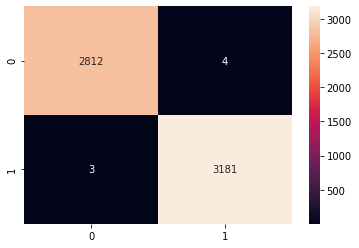

In [1464]:
cm = confusion_matrix(y_test, log_predicted)
print(cm)
sns.heatmap(cm, annot = True , fmt = "d")

In [1465]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x_train, y_train)
random_forest_predicted = random_forest.predict(x_test)
random_forest_training_score = round(random_forest.score(x_train, y_train) *100, 2 )
random_forest_testing_score = round(random_forest.score(x_test, y_test)*100, 2)
print('Random Forest Training Score: \n', random_forest_training_score)
print('Random Forest Testing Score: \n', random_forest_testing_score)
print('Accuracy: \n', accuracy_score(y_test, random_forest_predicted))
print('Classification Report:  \n', classification_report(y_test, random_forest_predicted))

Random Forest Training Score: 
 100.0
Random Forest Testing Score: 
 100.0
Accuracy: 
 1.0
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2816
           1       1.00      1.00      1.00      3184

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



[[2816    0]
 [   0 3184]]


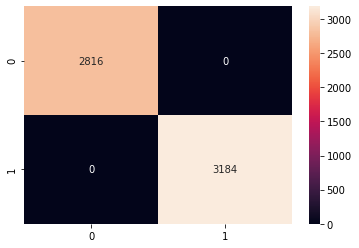

In [1466]:
cm = confusion_matrix(y_test, random_forest_predicted)
print(cm)
sns.heatmap(cm, annot = True , fmt = "d")

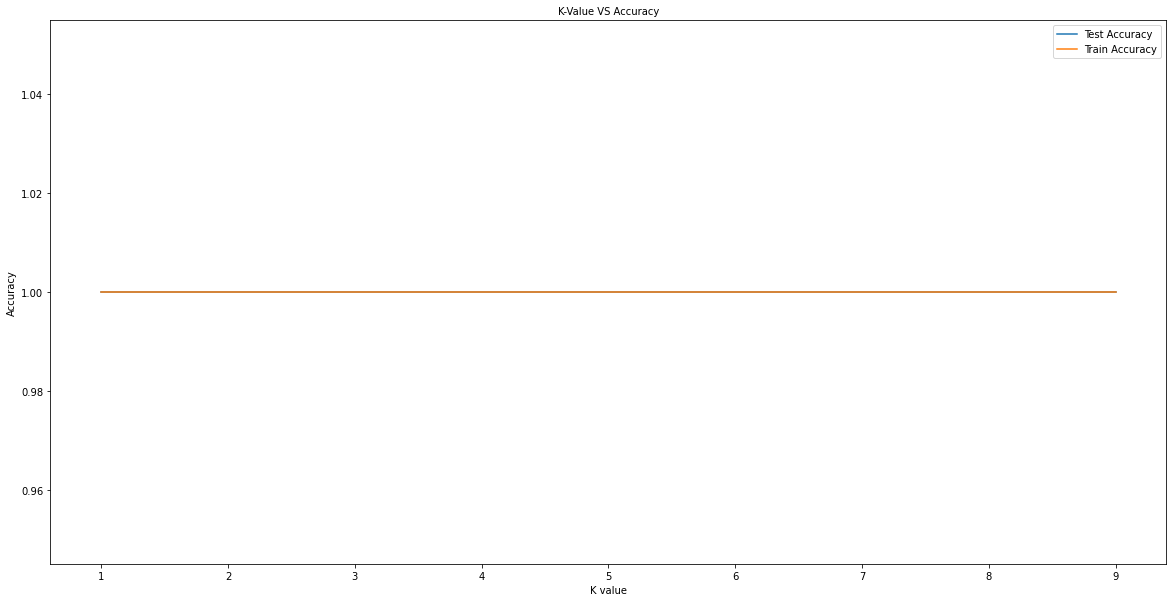

In [1467]:
neighborhood = np.array(range(1, 10))
train_accuracy, test_accuracy = [], []

# loop over different values of k
for k in neighborhood:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=(20,10))
plt.plot(neighborhood, test_accuracy, label = 'Test Accuracy')
plt.plot(neighborhood, train_accuracy, label = 'Train Accuracy')
plt.xlabel('K value',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('K-Value VS Accuracy',fontsize=10)

plt.xticks(neighborhood)
plt.legend(['Test Accuracy', 'Train Accuracy'])
plt.show()



In [1468]:
best_test_accuracy = max(test_accuracy)
print("The best test accuracy is", best_test_accuracy)
k_value = 1 + test_accuracy.index(best_test_accuracy)
print("The best k value is ", k_value)

The best test accuracy is 1.0
The best k value is  1


In [1469]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [1470]:
y_prediction = knn.predict(x_test)
training_accuracy = round(accuracy_score(y_train, knn.predict(x_train)) *100, 2)
testing_accuracy = round(accuracy_score(y_test, y_prediction)*100 , 2)
print("Training accuracy is: ", training_accuracy)
print("Testing accuracy is: ", testing_accuracy)
print('Classification Report:  \n', classification_report(y_test, y_prediction ))

Training accuracy is:  100.0
Testing accuracy is:  100.0
Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2816
           1       1.00      1.00      1.00      3184

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



[[2816    0]
 [   0 3184]]


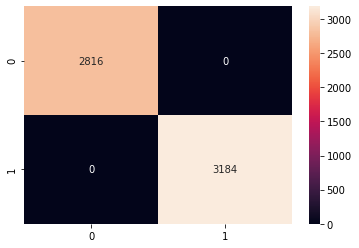

In [1471]:
cm = confusion_matrix(y_test, y_prediction)
print(cm)
sns.heatmap(cm, annot = True , fmt = "d")

In [1472]:
model_evaluation = pd.DataFrame({
    'Model': [ 'Linear Regression','Logistic Regression', 'Random Forest', 'KNN'],
    'Training Score': [lin_training_score, log_train_score, random_forest_training_score, training_accuracy],
    'Test Score': [ lin_test_score, log_test_score, random_forest_testing_score, testing_accuracy],
    })
model_evaluation.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score
2,Random Forest,100.00,100.00
3,KNN,100.00,100.00
1,Logistic Regression,99.94,99.88
0,Linear Regression,74.73,74.60
